# Load and visualize models

In [3]:
# HIDE CODE


import os, sys
sys.path.insert(0, './')
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
set_style()

In [4]:
device_idx = 0
device = f'cuda:{device_idx}'

## Load model

In [5]:
from base.utils_model import load_quick

# root = '/ssd-sata1/wj/PoissonVAE/models/poisson_uniform_c(-4)_CIFAR16_z-512_k-32_fp_nrm-none_<conv+b|lin>/'  # base directory for the project (update to match your setup)
root = '/ssd-sata1/wj/PoissonVAE/checkpoints/'
# root = add_home(f"{root}/checkpoints/")  # contains model checkpoints
print(os.listdir(root))

['poisson-<lin|lin>-vH16_mach-0_(2024_11_28,15:26)', 'poisson-<lin|lin>-vH16_mach-0_(2025_01_13,20:32)', 'laplace-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)', 'categorical-<lin|lin>-vH16_mach-0_(2024_11_28,14:22)', 'gaussian-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)']


In [6]:
models2load = {
    'poisson':'poisson-<lin|lin>-vH16_mach-0_(2025_01_13,20:32)',
    'poisson_reference': 'poisson-<lin|lin>-vH16_mach-0_(2024_11_28,15:26)',
    # 'categorical': 'categorical-<lin|lin>-vH16_mach-0_(2024_11_28,14:22)',
    # 'gaussian': 'gaussian-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)',
    # 'laplace': 'laplace-<lin|lin>-vH16_mach-0_(2024_11_28,14:19)',
}

In [23]:
trainers = {}
print(len(trainers))
for name, load_path in models2load.items():
    try:
        trainers[name], _ = load_quick(
            pjoin(root, load_path),
            lite=True,
            device=device,
            verbose=True,
        )
        # for layer_name, param in trainers[name].model.named_parameters():
        #     print(f"Layer: {layer_name}, Parameter: {param.shape}")
            
            
    except FileNotFoundError:
        continue


0

# params: 1.4 M
Layer: log_rate, Parameter: torch.Size([1, 512])
Layer: stem.weight, Parameter: torch.Size([32, 1, 3, 3])
Layer: stem.bias, Parameter: torch.Size([32])
Layer: stem.lognorm, Parameter: torch.Size([32])
Layer: enc.0.ops.0.conv.weight, Parameter: torch.Size([32, 32, 3, 3])
Layer: enc.0.ops.0.conv.bias, Parameter: torch.Size([32])
Layer: enc.0.ops.0.conv.lognorm, Parameter: torch.Size([32])
Layer: enc.0.ops.1.conv.weight, Parameter: torch.Size([32, 32, 3, 3])
Layer: enc.0.ops.1.conv.bias, Parameter: torch.Size([32])
Layer: enc.0.ops.1.conv.lognorm, Parameter: torch.Size([32])
Layer: enc.0.se.fc.0.weight, Parameter: torch.Size([4, 32])
Layer: enc.0.se.fc.0.bias, Parameter: torch.Size([4])
Layer: enc.0.se.fc.2.weight, Parameter: torch.Size([32, 4])
Layer: enc.0.se.fc.2.bias, Parameter: torch.Size([32])
Layer: enc.1.skip.ops.0.weight, Parameter: torch.Size([16, 32, 1, 1])
Layer: enc.1.skip.ops.0.bias, Parameter: torch.Size([16])
Layer: enc.1.skip.ops.0.lognorm, Parameter: t

## Plot dictionary $\Phi$

poisson


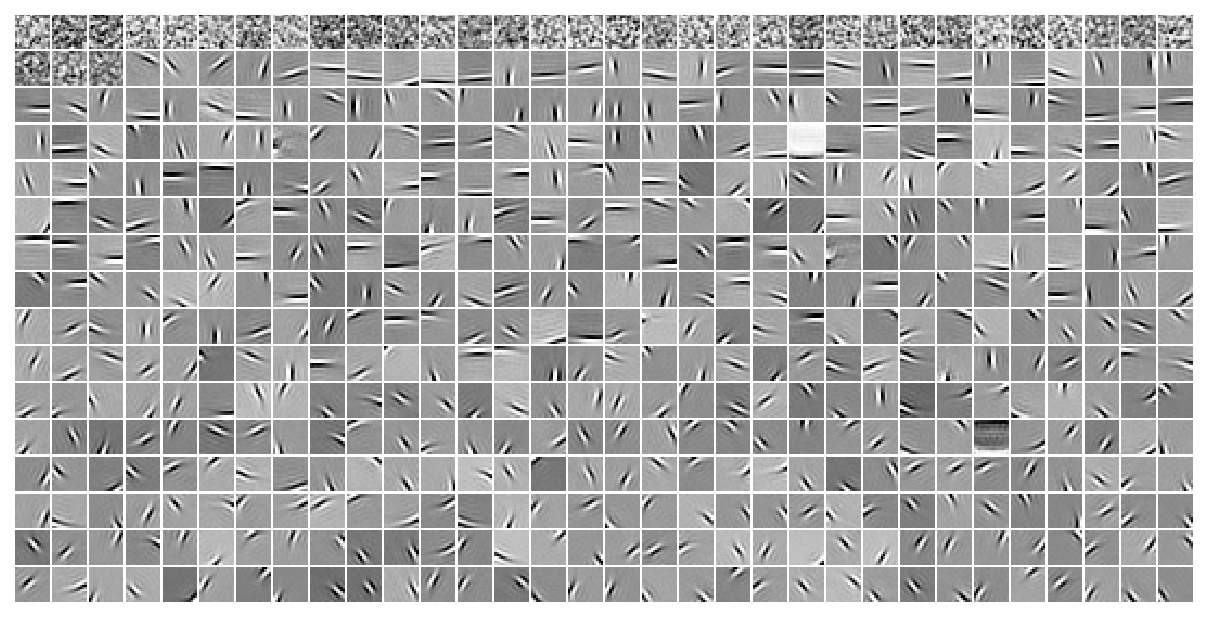

poisson_reference


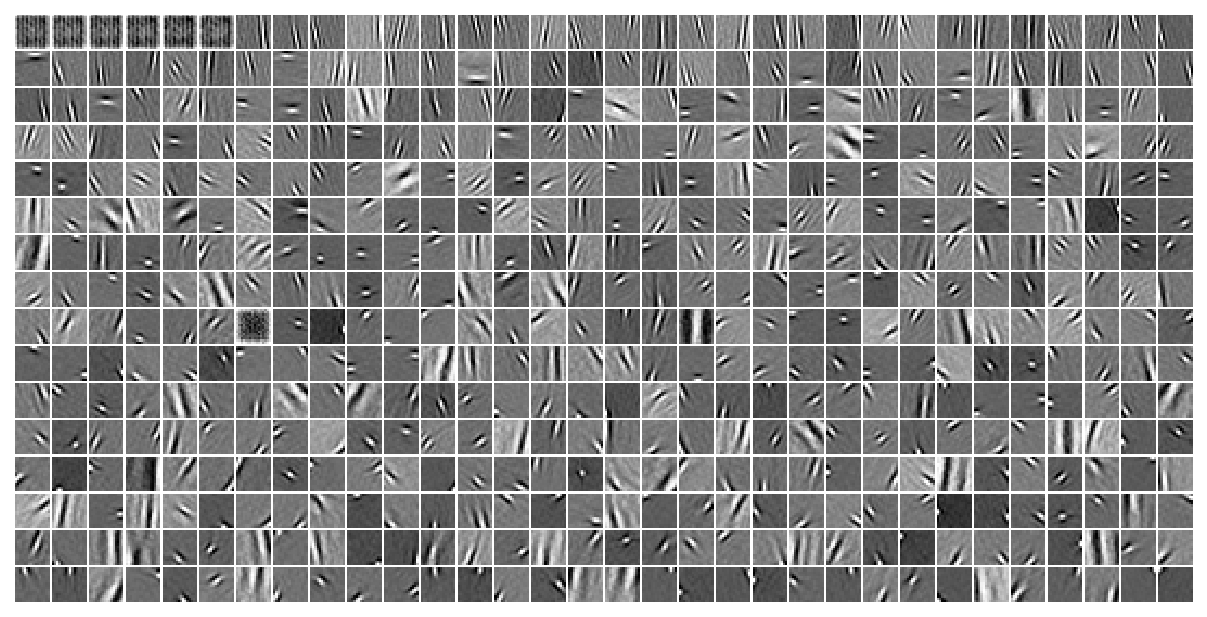

In [9]:
for name, tr in trainers.items():
    print(name)
    data, loss, etc = tr.validate()
    if tr.model.cfg.type == 'categorical':
        order = etc['logits'].mean(0).ravel()
        order = np.argsort(order)[::-1]
    else:
        order = np.argsort(loss['kl_diag'])
    fig, ax = tr.model.show(order=order, dpi=150)